In [1]:
%run "../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";

fileName = kimj;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
display (dfOriginal )
#for c in dfOriginal.columns: print (c,  end=', ')

<IPython.core.display.Javascript object>

,cname,ampm,timeofday,dateofmeasure,pef1,pef2,pef3,pefmax,indexpef,so2,co,o3,no2,pm10,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec,rainfallmm,windspeedms,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperaturecpoi,rainfallmmpoi,windspeedmspoi,precipitationpercentpoi,vaporpressurehpapoi,dewpointtemperaturecpoi,airpressurehpapoi,sealevelpressurehpapoi,groundtemperaturecpoi,winddirection,winddirectionpoi,tmax,amax,pmax,tmin,amin,pmin,tmode,amode,pmode,tmaxlesstmin,amaxlessamin,pmaxlesspmin,tmaxpoi,amaxpoi,pmaxpoi,tminpoi,aminpoi,pminpoi,tmodepoi,amodepoi,pmodepoi,tmaxlesstminpoi,amaxlessaminpoi,pmaxlesspminpoi,so2max,so2maxtime,so2min,so2mintime,comax,comaxtime,comin,comintime,o3max,o3maxtime,o3min,o3mintime,no2max,no2maxtime,no2min,no2mintime,pm10max,pm10maxtime,pm10min,pm10mintime,so2maxpoi,so2maxtimepoi,so2minpoi,so2mintimepoi,comaxpoi,comaxtimepoi,cominpoi,comintimepoi,o3maxpoi,o3maxtimepoi,o3minpoi,o3mintimepoi,no2maxpoi,no2maxtimepoi,no2minpoi,no2mintimepoi,pm10maxpoi,pm10maxtimepoi,pm10minpoi,pm10mintimepoi
0,kimj,am,05:47:00,2015-02-05,121.000,98.000,112.000,121.000,R,0.216,29.800,0.407,1.264,2168.000,0.309,30.200,0.321,1.185,2490.000,-1.900,0.981,1.800,68.000,3.600,-7.000,1018.000,1022.400,-1.800,-1.900,1.008,2.500,96.000,5.100,-2.400,1013.500,1022.600,0.000,320,340.000,5.100,1020.900,99.000,-4.400,1000.000,36.000,0.300,1017.900,98.000,9.500,20.900,63.000,4.200,1015.900,99.000,-2.300,1000.000,66.000,1.300,1015.700,99.000,6.500,15.900,33.000,0.014,13.000,0.004,5.000,1.800,22.000,0.900,15.000,0.037,17.000,0.002,4.000,0.084,10.000,0.020,2.000,141.000,21.000,62.000,7.000,0.019,12.000,0.007,5.000,1.700,7.000,0.900,3.000,0.030,3.000,0.002,5.000,0.069,7.000,0.022,3.000,128.000,1.000,77.000,5.000
1,kimj,am,06:09:00,2015-02-06,85.000,75.000,68.000,85.000,R,0.241,19.400,0.618,0.889,2127.000,0.279,22.100,0.395,1.087,2495.000,-4.700,0.981,0.500,93.000,4.000,-5.600,1021.900,1026.300,-2.800,-2.500,1.008,0.900,79.000,4.000,-5.600,1016.800,1026.000,-0.600,110,290.000,4.700,1021.900,91.000,-4.400,1000.000,42.000,1.200,1021.500,45.000,9.100,21.900,49.000,3.500,1017.100,93.000,-2.600,1000.000,62.000,-2.200,1014.400,79.000,6.100,17.100,31.000,0.018,11.000,0.006,20.000,1.100,11.000,0.500,4.000,0.041,14.000,0.006,9.000,0.057,9.000,0.015,3.000,125.000,12.000,57.000,4.000,0.018,14.000,0.007,23.000,1.200,9.000,0.700,2.000,0.031,3.000,0.004,6.000,0.064,18.000,0.019,3.000,127.000,14.000,77.000,5.000
2,kimj,am,06:34:00,2015-02-07,113.000,123.000,114.000,123.000,R,0.168,17.600,0.275,1.166,1262.000,0.244,20.900,0.229,1.179,1720.918,-1.900,0.981,0.800,91.000,4.900,-3.100,1018.900,1023.300,-1.300,0.300,1.008,2.300,97.000,6.100,-0.100,1013.900,1023.000,0.100,200,200.000,6.100,1023.000,94.000,-4.700,1000.000,44.000,-1.900,1021.400,92.000,10.800,23.000,50.000,4.200,1018.000,96.000,-2.800,1000.000,67.000,0.300,1016.700,81.000,7.000,18.000,29.000,0.012,10.000,0.004,19.000,1.300,9.000,0.400,14.000,0.033,15.000,0.002,22.000,0.069,9.000,0.019,15.000,81.000,9.000,34.000,17.000,0.015,12.000,0.007,5.000,1.200,9.000,0.500,14.000,0.031,3.000,0.010,5.000,0.069,1.000,0.019,3.000,92.000,9.000,47.459,19.000
3,kimj,am,09:26:00,2015-02-08,98.000,104.000,128.000,128.000,R,0.152,11.700,0.669,0.498,1683.000,0.223,14.000,0.455,0.703,1527.000,-9.800,0.981,4.600,33.000,1.000,-23.000,1022.700,1027.200,-4.100,-11.100,1.008,6.800,48.000,1.300,-19.900,1018.200,1027.700,-3.100,320,360.000,5.100,1022.200,86.000,-10.400,1000.000,32.000,5.100,1015.600,32.000,15.500,22.200,54.000,5.700,1017.500,99.000,-11.200,1000.000,45.000,3.800,1010.800,96.000,16.900,17.500,54.000,0.012,11.000,0.002,7.000,1.300,9.000,0.200,2.000,0.040,17.000,0.003,9.000,0.072,9.000,0.002,3.000,174.000,8.000,30.000,12.000,0.014,14.000,0.006,7.000,0.900,22.000,0.400,2.000,0.028,18.000,0.002,9.000,0.053,11.000,0.008,5.000,94.000,8.000,37.000,22.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [2]:
df=dfOriginal.copy()
df.insert(4, 'npt',0)
df.insert(4, 'pef',0)
df.npt = pd.notnull(df.pef1)*1 + pd.notnull(df.pef2)*1 + pd.notnull(df.pef3)*1
df = df[df.npt > 0]
df=df.reset_index(drop=True)
df.pef = (df.pef1 + df.pef2 + df.pef3)/df.npt

df=df.fillna(0)
df.loc[df.timeofday == 'null', 'timeofday'] = "00:00:00"
sdttm = df.dateofmeasure + " " + df.timeofday 
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, pef, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)

#df.to_csv("HanD/hand1.csv", sep=';')
df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')
df1

,pefmax,so2,co,o3,no2,pm10,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec,rainfallmm,windspeedms,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperaturecpoi,rainfallmmpoi,windspeedmspoi,precipitationpercentpoi,vaporpressurehpapoi,dewpointtemperaturecpoi,airpressurehpapoi,sealevelpressurehpapoi,groundtemperaturecpoi,winddirection,winddirectionpoi,tmax,amax,pmax,tmin,amin,pmin,tmode,amode,pmode,tmaxlesstmin,amaxlessamin,pmaxlesspmin,tmaxpoi,amaxpoi,pmaxpoi,tminpoi,aminpoi,pminpoi,tmodepoi,amodepoi,pmodepoi,tmaxlesstminpoi,amaxlessaminpoi,pmaxlesspminpoi,so2max,so2maxtime,so2min,so2mintime,comax,comaxtime,comin,comintime,o3max,o3maxtime,o3min,o3mintime,no2max,no2maxtime,no2min,no2mintime,pm10max,pm10maxtime,pm10min,pm10mintime,so2maxpoi,so2maxtimepoi,so2minpoi,so2mintimepoi,comaxpoi,comaxtimepoi,cominpoi,comintimepoi,o3maxpoi,o3maxtimepoi,o3minpoi,o3mintimepoi,no2maxpoi,no2maxtimepoi,no2minpoi,no2mintimepoi,pm10maxpoi,pm10maxtimepoi,pm10minpoi,pm10mintimepoi
sdttm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-02-04 21:33:00,98.000,0.179,28.800,0.253,1.521,1880.000,0.269,29.800,0.202,1.346,2182.000,0.300,0.981,0.700,94.000,5.900,-0.500,1017.900,1022.200,-0.200,1.300,1.008,1.600,99.000,6.600,1.100,1013.000,1022.000,0.200,110,320.000,5.100,1023.300,99.000,-4.400,1000.000,36.000,5.100,1020.700,98.000,9.500,23.300,63.000,4.200,1018.500,99.000,-2.300,1000.000,66.000,-1.900,1015.700,99.000,6.500,18.500,33.000,0.014,13.000,0.004,2.000,1.600,10.000,0.900,15.000,0.037,17.000,0.002,21.000,0.084,10.000,0.030,17.000,111.000,20.000,62.000,7.000,0.019,12.000,0.007,22.000,1.700,7.000,0.900,22.000,0.024,15.000,0.002,7.000,0.069,7.000,0.033,15.000,112.000,11.000,76.000,2.000
2015-02-05 05:47:00,121.000,0.216,29.800,0.407,1.264,2168.000,0.309,30.200,0.321,1.185,2490.000,-1.900,0.981,1.800,68.000,3.600,-7.000,1018.000,1022.400,-1.800,-1.900,1.008,2.500,96.000,5.100,-2.400,1013.500,1022.600,0.000,320,340.000,5.100,1020.900,99.000,-4.400,1000.000,36.000,0.300,1017.900,98.000,9.500,20.900,63.000,4.200,1015.900,99.000,-2.300,1000.000,66.000,1.300,1015.700,99.000,6.500,15.900,33.000,0.014,13.000,0.004,5.000,1.800,22.000,0.900,15.000,0.037,17.000,0.002,4.000,0.084,10.000,0.020,2.000,141.000,21.000,62.000,7.000,0.019,12.000,0.007,5.000,1.700,7.000,0.900,3.000,0.030,3.000,0.002,5.000,0.069,7.000,0.022,3.000,128.000,1.000,77.000,5.000
2015-02-05 21:34:00,89.000,0.276,24.400,0.574,0.981,2531.000,0.313,25.700,0.378,1.108,2784.000,0.100,0.981,1.500,78.000,4.800,-3.200,1021.000,1025.300,-0.300,0.200,1.008,4.300,85.000,5.300,-2.000,1016.300,1025.400,0.100,250,320.000,4.700,1020.700,97.000,-3.300,1000.000,42.000,0.300,1017.900,67.000,8.000,20.700,55.000,3.500,1015.900,99.000,-2.600,1000.000,62.000,1.300,1013.500,88.000,6.100,15.900,37.000,0.018,11.000,0.006,20.000,1.800,22.000,0.700,16.000,0.041,14.000,0.003,22.000,0.075,22.000,0.020,2.000,141.000,21.000,81.000,20.000,0.018,14.000,0.009,20.000,1.400,21.000,0.800,16.000,0.030,3.000,0.004,6.000,0.064,18.000,0.022,3.000,128.000,1.000,91.000,20.000
2015-02-06 06:09:00,85.000,0.241,19.400,0.618,0.889,2127.000,0.279,22.100,0.395,1.087,2495.000,-4.700,0.981,0.500,93.000,4.000,-5.600,1021.900,1026.300,-2.800,-2.500,1.008,0.900,79.000,4.000,-5.600,1016.800,1026.000,-0.600,110,290.000,4.700,1021.900,91.000,-4.400,1000.000,42.000,1.200,1021.500,45.000,9.100,21.900,49.000,3.500,1017.100,93.000,-2.600,1000.000,62.000,-2.200,1014.400,79.000,6.100,17.100,31.000,0.018,11.000,0.006,20.000,1.100,11.000,0.500,4.000,0.041,14.000,0.006,9.000,0.057,9.000,0.015,3.000,125.000,12.000,57.000,4.000,0.018,14.000,0.007,23.000,1.200,9.000,0.700,2.000,0.031,3.000,0.004,6.000,0.064,18.000,0.019,3.000,127.000,14.000,77.000,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

pefmax, so2, co, o3, no2, pm10, so2poi, copoi, o3poi, no2poi, pm10poi, temperaturec, rainfallmm, windspeedms, precipitationpercent, vaporpressurehpa, dewpointtemperaturec, airpressurehpa, sealevelpressurehpa, groundtemperaturec, temperaturecpoi, rainfallmmpoi, windspeedmspoi, precipitationpercentpoi, vaporpressurehpapoi, dewpointtemperaturecpoi, airpressurehpapoi, sealevelpressurehpapoi, groundtemperaturecpoi, winddirection, winddirectionpoi, tmax, amax, pmax, tmin, amin, pmin, tmode, amode, pmode, tmaxlesstmin, amaxlessamin, pmaxlesspmin, tmaxpoi, amaxpoi, pmaxpoi, tminpoi, aminpoi, pminpoi, tmodepoi, amodepoi, pmodepoi, tmaxlesstminpoi, amaxlessaminpoi, pmaxlesspminpoi, so2max, so2maxtime, so2min, so2mintime, comax, comaxtime, comin, comintime, o3max, o3maxtime, o3min, o3mintime, no2max, no2maxtime, no2min, no2mintime, pm10max, pm10maxtime, pm10min, pm10mintime, so2maxpoi, so2maxtimepoi, so2minpoi, so2mintimepoi, comaxpoi, comaxtimepoi, cominpoi, comintimepoi, o3maxpoi, o3maxtimepoi,

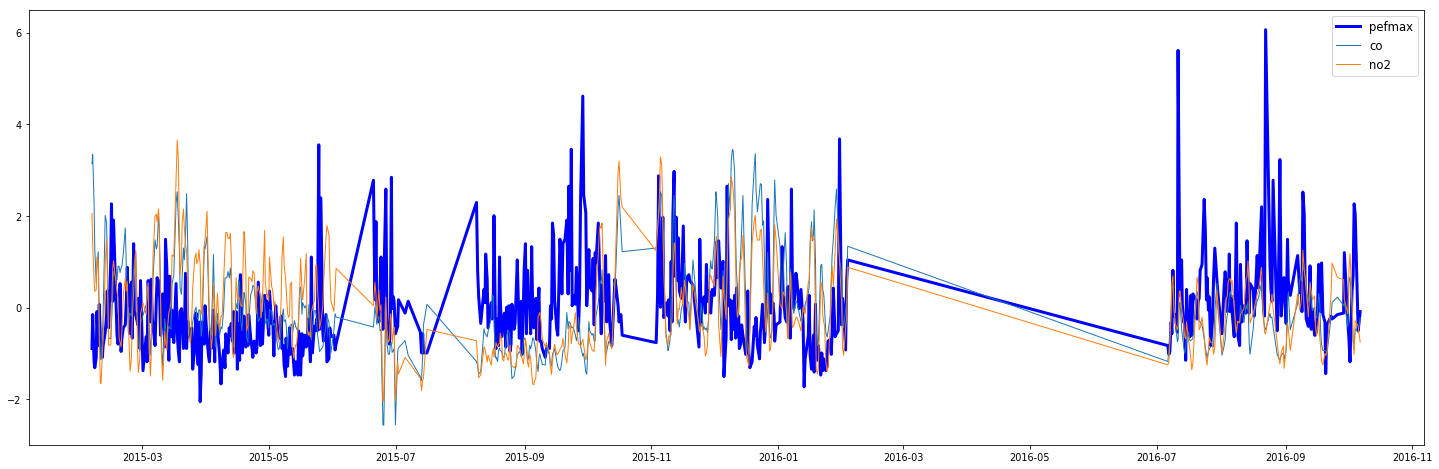

In [3]:
for c in df1.columns:
    print(c, end=', ')

scaler = StandardScaler()
dp = prepareDF(df1, True)
for c in dp.columns:
    dp[c] = scaler.fit_transform(dp[c])

plt.figure(figsize=(25, 8))
plt.rc('font', size=14)

#dp = dp[0:90]
#dp = dp["pef,so2,co,o3,no2,pm10,tmax,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec".split(',')]
#dp = dp["pef,so2,co,o3,no2,pm10,temperaturec,rainfallmm,windspeedms,vaporpressurehpa".split(',')]
#dp = dp["pef,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec,rainfallmm,windspeedms,vaporpressurehpa".split(',')]

rolmean = pd.rolling_mean(dp.pefmax, window=14)

plt.plot(dp.index, dp.pefmax, color='b', linewidth=3)
#plt.plot(dp.index, rolmean, color='r', linewidth=2, label='trend')
#plt.plot(dp.index, dp.so2)
plt.plot(dp.index, dp.co)
#plt.plot(dp.index, dp.o3)
plt.plot(dp.index, dp.no2)
#plt.plot(dp.index, dp.pm10)
#plt.plot(dp.index, dp.tmax)
#plt.plot(dp.index, dp.amax)
#plt.plot(dp.index, dp.pmax)

plt.legend()

In [ ]:
#display(HTML(dp.to_html()) )


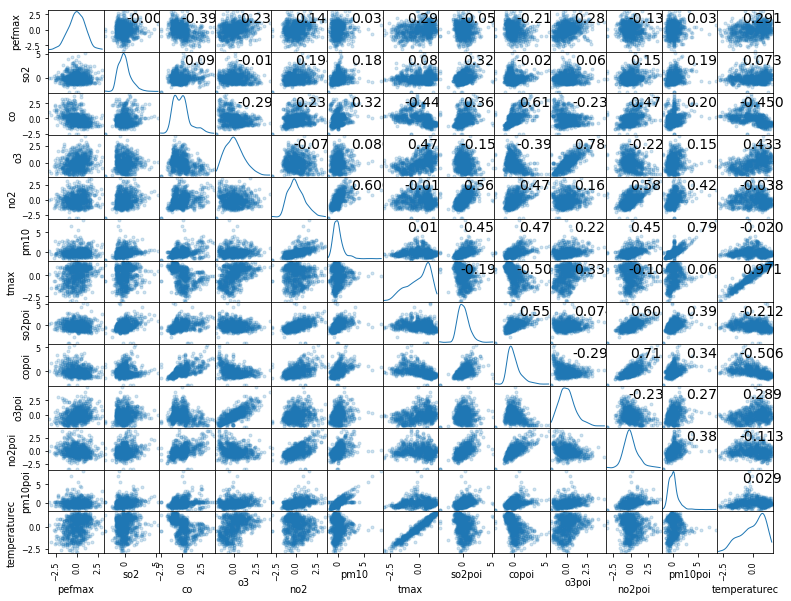

In [4]:
c="r,g,b,c,m,y,k,w".split(",")
dpc = dp["pefmax,so2,co,o3,no2,pm10,tmax,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec".split(',')]
axes = scatter_matrix(dpc, alpha=0.2, diagonal='kde', figsize=(13, 10)); # diagonal can be 'hist';

corr = dpc.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()


In [4]:
def run_reg(X,y,reg_class,printDebug = False , reg=None):
    # Construct a kfolds object
    kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
    y_pred = y.copy()

    # Iterate through folds\
    i = 0;
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = reg_class(**kwargs) if (reg is None)  else reg;
        if (printDebug): print ("*",i, end ="");
        reg.fit(X_train,y_train)
        y_pred[test_index] = reg.predict(X_test)
        i = i +1;
    if (printDebug): print ("*", end="");
        
    m = mean_squared_error(y, y_pred)

    return y_pred, m, clf

In [16]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'quantile', 'alpha':.95}


clfs = [
    ensemble.GradientBoostingRegressor(**params),
    ensemble.GradientBoostingRegressor(loss='quantile', alpha=.95,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9),
    DecisionTreeRegressor(max_depth=2), 
    DecisionTreeRegressor(max_depth=15),
    linear_model.LinearRegression(),
    RandomForestRegressor(max_depth=50, random_state=0),
    AdaBoostRegressor(),
#    Lasso(alpha=0.2,normalize=True, max_iter=1e5),
#    Lasso(alpha=0.5,normalize=True, max_iter=1e5),
    Ridge(alpha=0.1,normalize=True),
    Ridge(alpha=0.5,normalize=True),

#    GaussianProcess(corr='squared_exponential', theta0=1e-1, thetaL=1e-3, thetaU=1,random_start=100),
#    GaussianProcess( theta0=1e-1, thetaL=1e-3, thetaU=1,random_start=100),

    SVR(kernel='rbf', C=1e3, gamma=0.1),
    SVR(kernel='linear', C=1e3),
    SVR(kernel='poly', C=1e3, degree=2)  ,
]

#rclfs={}


+Run Start  0 2017-04-11 22:17:38.048676 : GradientBoostingRegressor * 0* 1* 2* 3* 4*- Gradien..m MSE 01.3 0:10:08
+Run Start  1 2017-04-11 22:27:46.806781 : GradientBoostingRegressor * 0* 1* 2* 3* 4*- Gradien..m MSE 0.96 0:03:38
+Run Start  2 2017-04-11 22:31:24.829441 : DecisionTreeRegressor(cri DecisionTreeReg already exists:
+Run Start  3 2017-04-11 22:31:24.830137 : DecisionTreeRegressor(cri DecisionTreeReg already exists:
+Run Start  4 2017-04-11 22:31:24.830775 : LinearRegression(copy_X=T LinearRegressio already exists:
+Run Start  5 2017-04-11 22:31:24.831110 : RandomForestRegressor(boo RandomForestReg already exists:
+Run Start  6 2017-04-11 22:31:24.831991 : AdaBoostRegressor(base_es AdaBoostRegress already exists:
+Run Start  7 2017-04-11 22:31:24.832374 : Ridge(alpha=0.1, copy_X=T * 0* 1* 2* 3* 4*- Ridge(a..m MSE 0.95 0:00:00
+Run Start  8 2017-04-11 22:31:25.176175 : Ridge(alpha=0.5, copy_X=T Ridge(alpha=0.5 already exists:
+Run Start  9 2017-04-11 22:31:25.176778 : SVR(C=

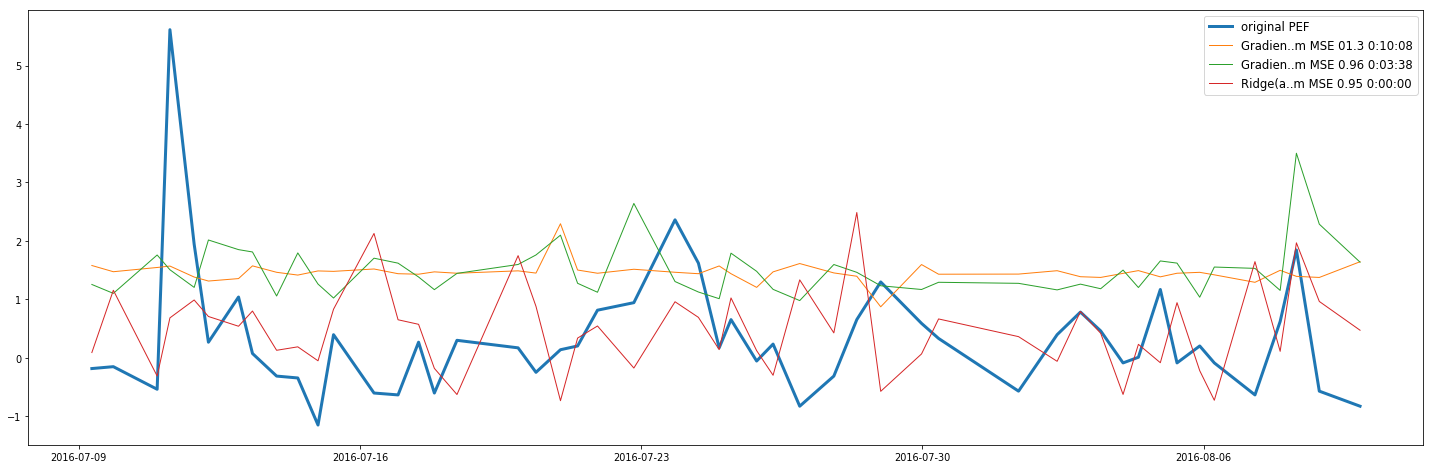

In [17]:
#dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]

dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

X = dp1.ix[:, dp1.columns != 'pefmax']
y = dp1.pefmax
X = X.as_matrix().astype(np.float)

##---- Polynomial features
poly=2
p = PolynomialFeatures(poly)
o = p.fit_transform(X)
X = o


plt.figure(figsize=(25, 8))
h1, h2 =-100, None
h1, h2 =500, 550
plt.plot(dp.index[h1:h2], y[h1:h2], label='original PEF', linewidth=3)


for i, r in enumerate(clfs):
    d1 = datetime.datetime.now()
    print ("+Run Start {:2} {} : {}".format(i, d1, str(r)[0:25]) , end=' ')
    
    if ( rclfs.get(str(r)) is not None ):
        print ("{} already exists:".format(str(r)[0:15]))
        continue;
        
    yp, mse,clf = run_reg(X,y, None, True, r)
    
    d2 = datetime.datetime.now()
    dur = d2 -d1;
    dur = dur - datetime.timedelta(microseconds=dur.microseconds)
    rclfs[str(clf)]=(yp, mse, clf, dur ) 
    l='{} MSE {:04.2} {}'.format( str(clf)[0:7]+'..'+str(c[-5]), mse, str(dur))
    print('-', l)
    
    plt.plot(dp.index[h1:h2], yp[h1:h2], label=l )
    #if ( i > 11):
    #    break;


plt.legend()


[ DecisionTreeRegre..m ] : MSE 00.91 0:00:01 1
[ DecisionTreeRegre..m ] : MSE 002.0 0:00:07 1
[ Ridge(alpha=0.2, ..m ] : MSE 001.5 0:00:00 1
[ RandomForestRegre..m ] : MSE 001.0 0:00:44 1
[ SVR(C=1000.0, cac..m ] : MSE 001.0 0:00:06 1
[ LinearRegression(..m ] : MSE 001.7 0:00:00 1
[ Lasso(alpha=0.5, ..m ] : MSE 001.0 0:00:00 1
[ Ridge(alpha=0.1, ..m ] : MSE 001.6 0:00:00 1
[ Lasso(alpha=0.2, ..m ] : MSE 001.0 0:00:00 1
[ GradientBoostingR..m ] : MSE 003.4 0:10:08 1
[ SVR(C=1000.0, cac..m ] : MSE 001.7 0:00:06 1
[ AdaBoostRegressor..m ] : MSE 00.98 0:01:22 1
[ GradientBoostingR..m ] : MSE 003.0 0:03:38 1
[ Ridge(alpha=0.5, ..m ] : MSE 001.2 0:00:00 1
[ SVR(C=1000.0, cac..m ] : MSE 001.2 0:00:06 1


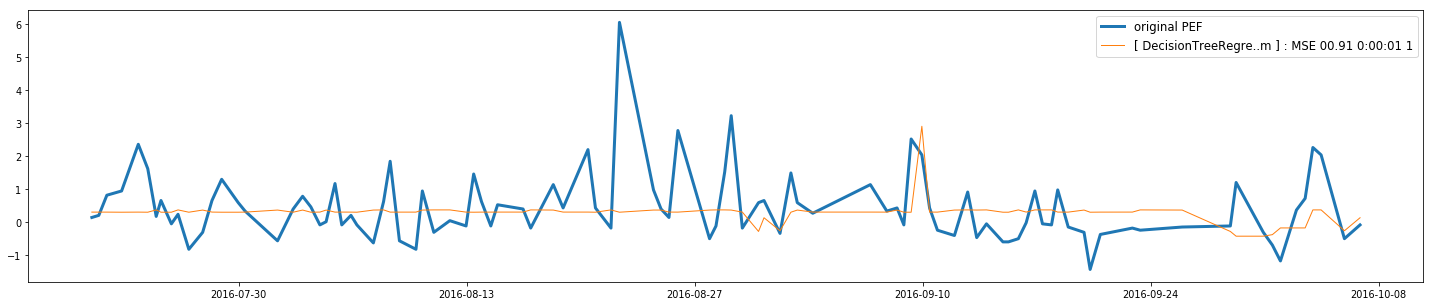

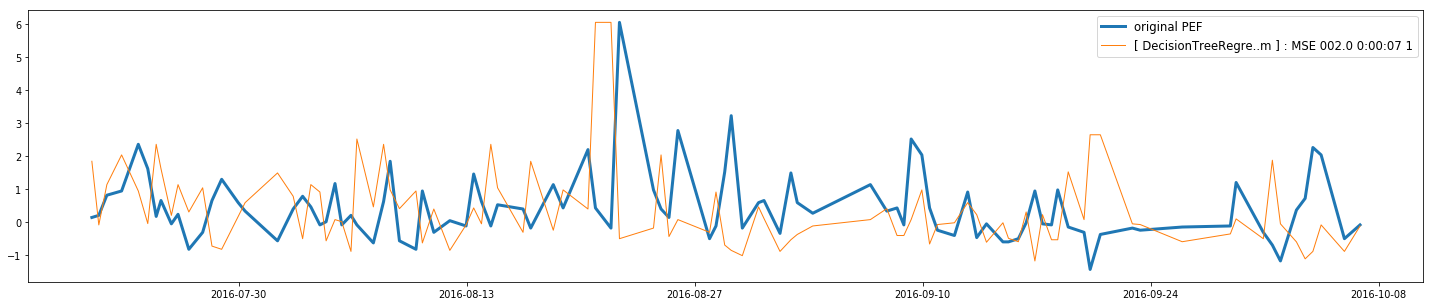

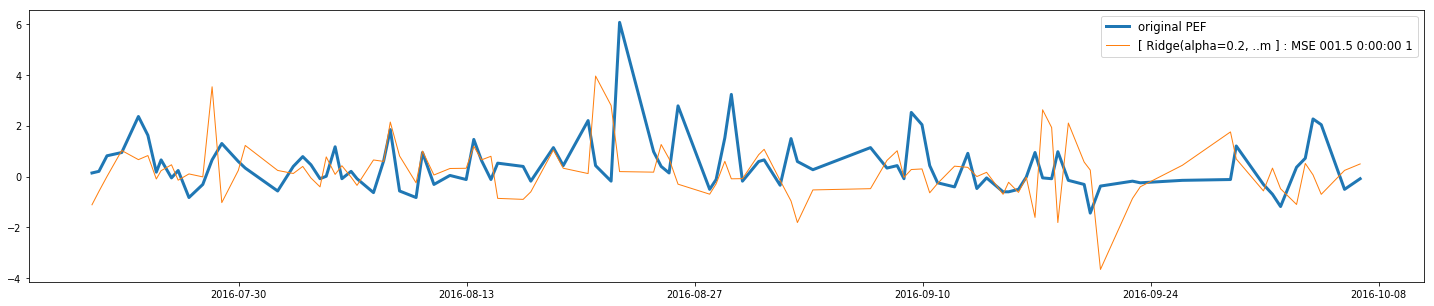

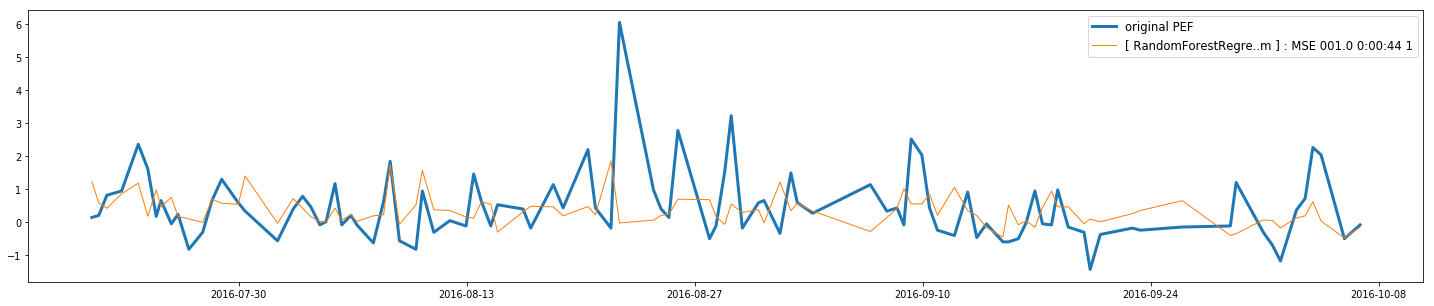

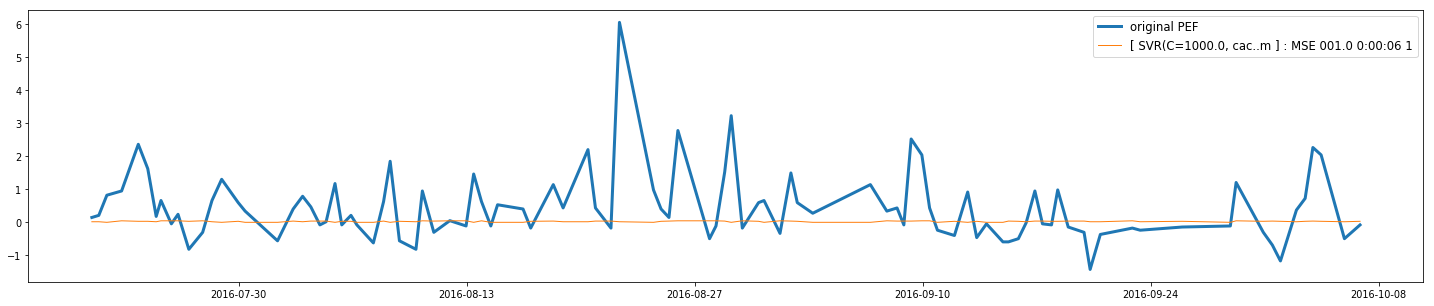

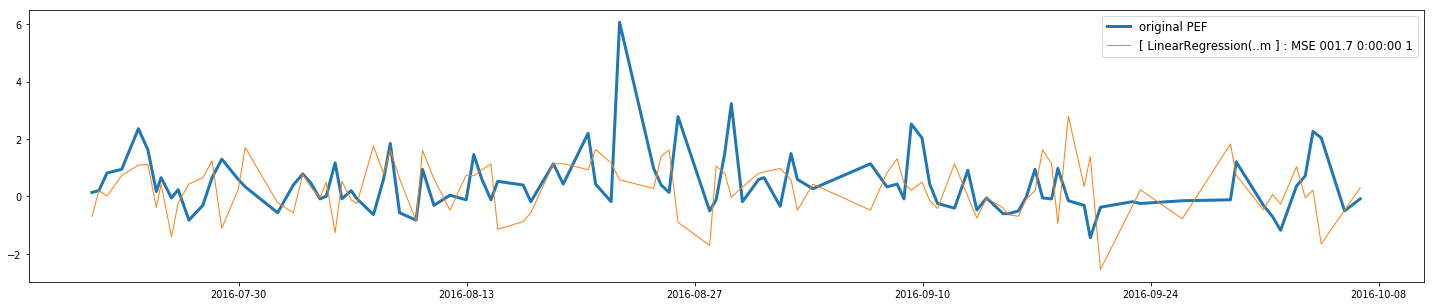

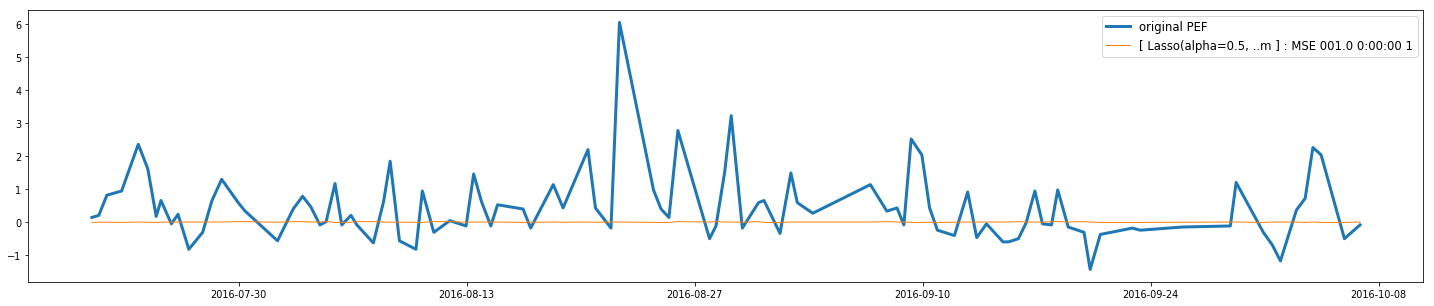

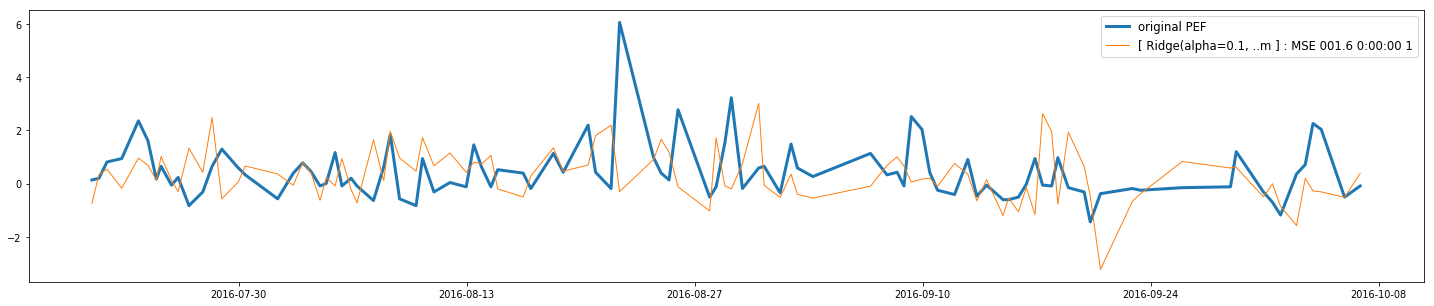

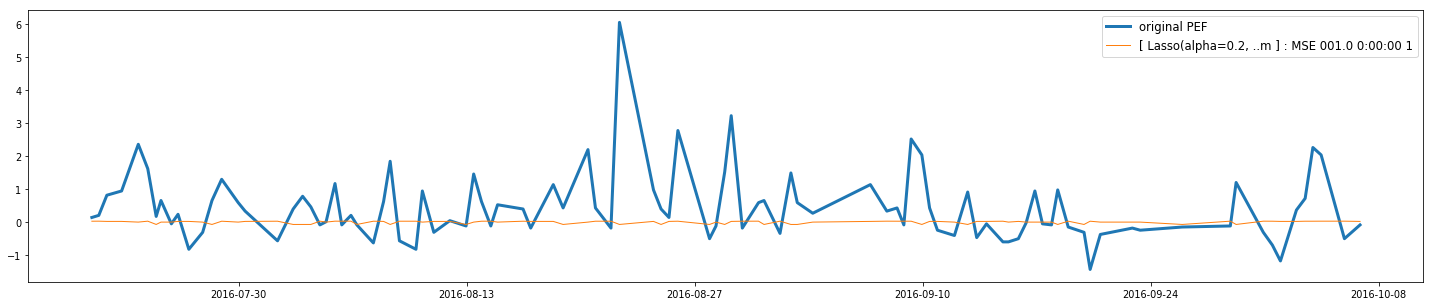

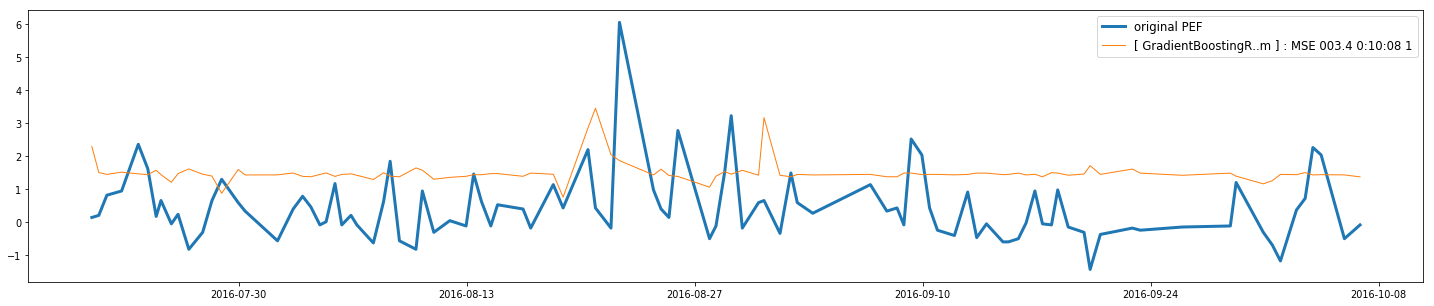

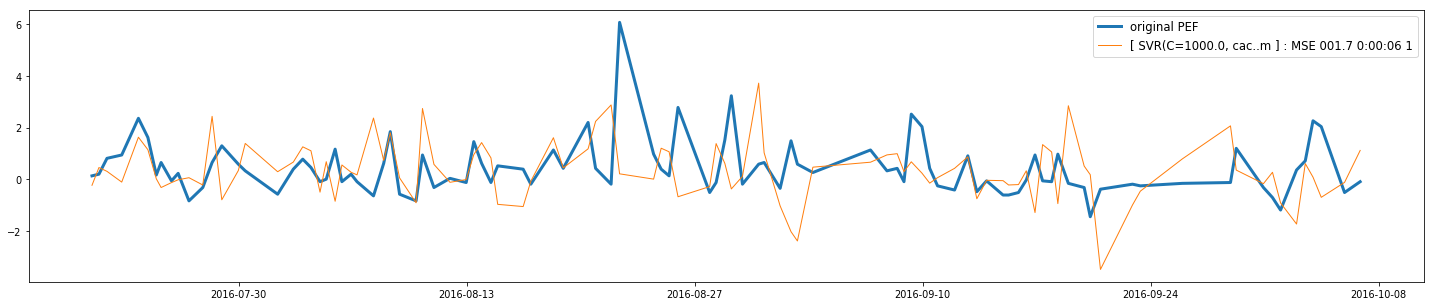

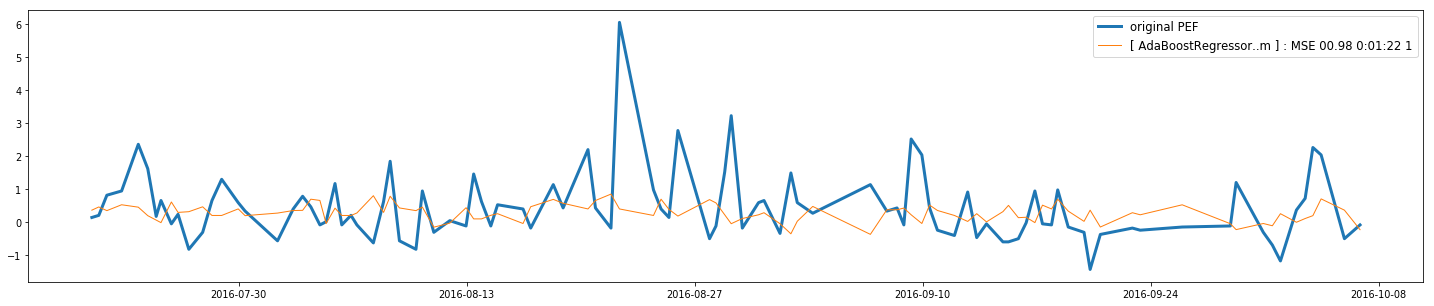

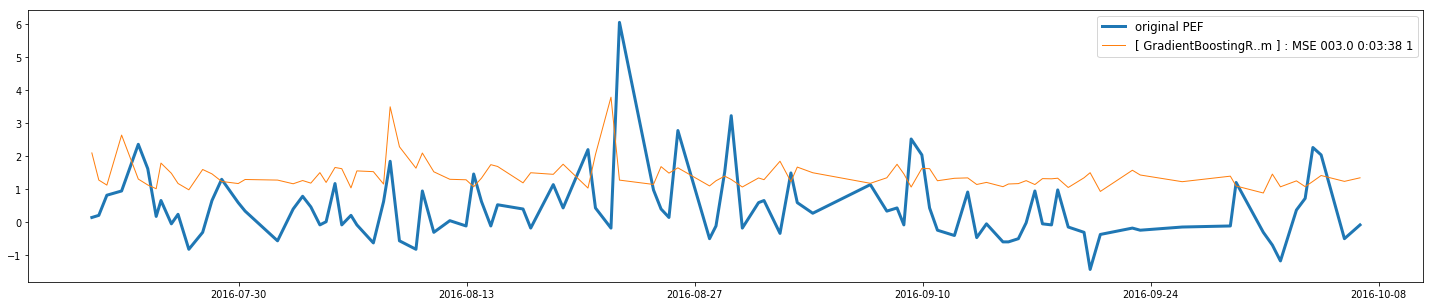

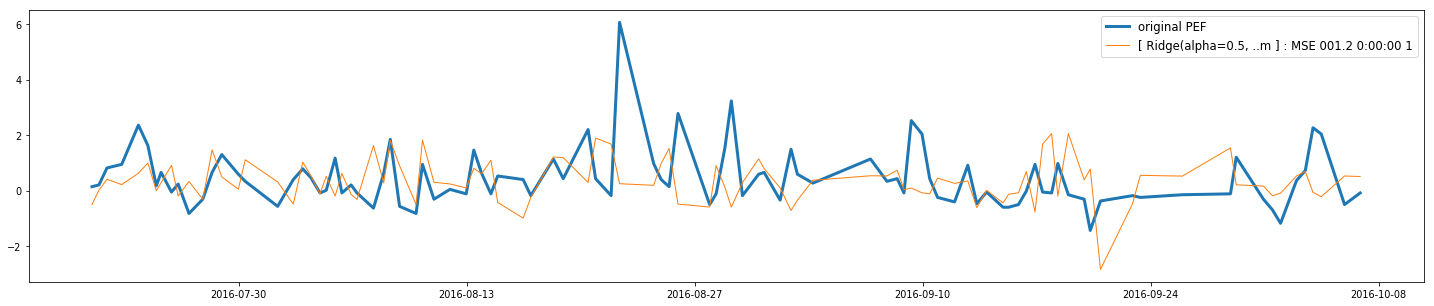

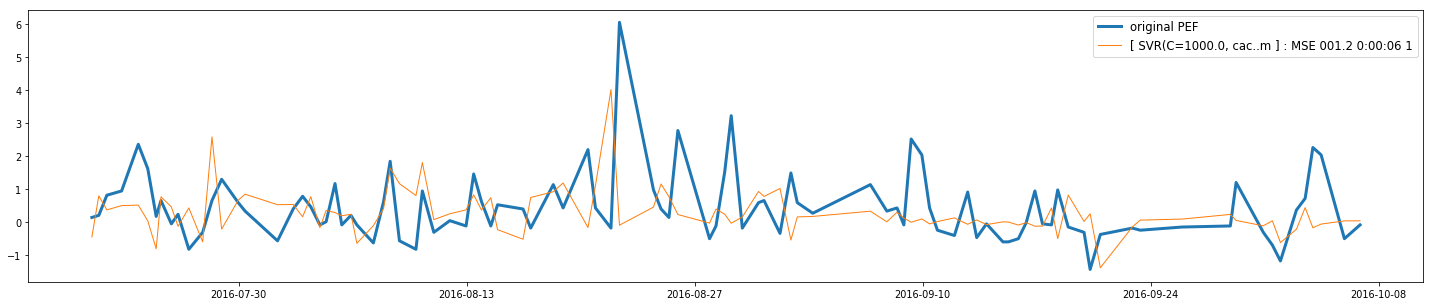

In [22]:
def plotcl(rclfs, clf, dp):
    poly=1
    yp, mse, clf, df = rclfs[clf]
    l='[ {} ] : MSE {:05.2} {} {}'.format( str(clf)[0:17]+'..'+str(c[-10]), mse, str(df), poly)
    plt.figure(figsize=(25, 5))
    h1, h2 =-100, None
#    h1, h2 =500, 550
    plt.plot(dp.index[h1:h2], y[h1:h2], label='original PEF', linewidth=3)
    plt.plot(dp.index[h1:h2], yp[h1:h2], label=l )
    plt.legend()
    print(l)
        
for clf in rclfs.keys():
    plotcl(rclfs, clf, dp)
#    break;